In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
path = "C:\\ENS\\Hidrologia"
dados = pd.read_excel(path+'\\Dados_ANA.xlsx')
dados = dados.set_index('Data') 
dados['Q ord (m³/s)'] = sorted(dados['Vazão'], reverse=True)
dados['Ordem i'] = range(1, len(dados['Vazão'])+1)
dados['P exc (%)'] = 100*dados['Ordem i']/(len(dados['Ordem i'])+1)
dados.head()

,Vazão,Q ord (m³/s),Ordem i,P exc (%)
Data,,,,
1980-01-01,14.9940,1077.3507,1,0.007605
1980-01-02,13.8888,971.6529,2,0.015209
1980-01-03,12.8170,962.8472,3,0.022814
1980-01-04,11.2734,930.0946,4,0.030418
1980-01-05,9.8087,887.0893,5,0.038023


In [3]:
dados['abs(90-P)'] = abs(90-dados['P exc (%)'])
Q90 = dados.loc[dados['abs(90-P)'] == min(dados['abs(90-P)'])]
Q90 = Q90.reset_index()
Q90 

,Data,Vazão,Q ord (m³/s),Ordem i,P exc (%),abs(90-P)
0,2012-05-26,0.8703,4.207,11835,90.0,0.0


In [4]:
dados['abs(95-P)'] = abs(95-dados['P exc (%)'])
Q95 = dados.loc[dados['abs(95-P)'] == min(dados['abs(95-P)'])]
Q95 = Q95.reset_index()
Q95

,Data,Vazão,Q ord (m³/s),Ordem i,P exc (%),abs(90-P),abs(95-P)
0,2014-03-14,12.0105,2.7761,12492,94.996198,4.996198,0.003802
1,2014-03-15,10.0012,2.7761,12493,95.003802,5.003802,0.003802


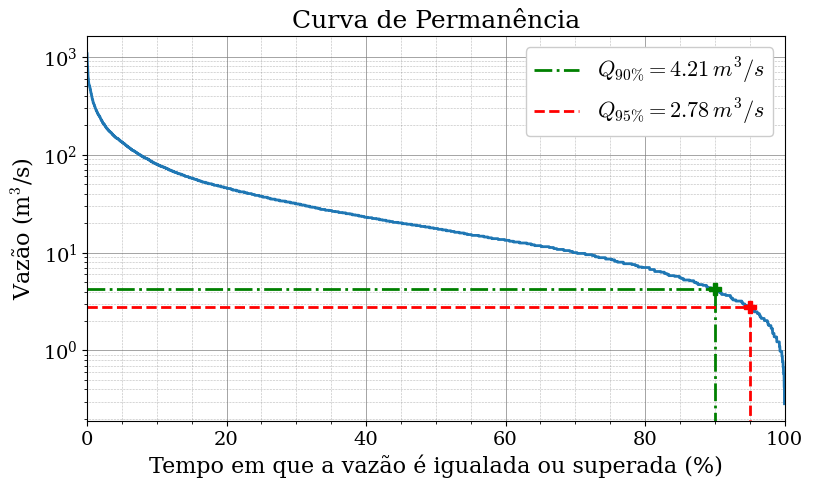

In [6]:
fig,ax = plt.subplots(figsize=(9,5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm' 

ax.plot(dados['P exc (%)'], 
        dados['Q ord (m³/s)'], 
        linewidth=2) 

y = Q90.loc[0, 'Q ord (m³/s)']
ax.plot([0, 90], 
        [y, y],
        color='green',
        linestyle='-.',
        linewidth=2,
        label=rf'$Q_{{90\%}}={y:.2f}\, m^3/s$') 
ax.plot([90, 90], 
        [0, y],
        color='green',
        linestyle='-.',
        linewidth=2) 
ax.plot(90, y, 
        marker='P', 
        color='green',
        markersize=8)

y = Q95.loc[0, 'Q ord (m³/s)']
ax.plot([0, 95], 
        [y, y],
        color='red',
        linestyle='--',
        linewidth=2,
        label=rf'$Q_{{95\%}}={y:.2f}\, m^3/s$') 
ax.plot([95, 95], 
        [0, y],
        color='red',
        linestyle='--',
        linewidth=2) 
ax.plot(95, y, 
        marker='P', 
        color='red',
        markersize=8)

plt.yscale('log') 
plt.title('Curva de Permanência', size = 18)
plt.xlabel('Tempo em que a vazão é igualada ou superada (%)', 
           size = 16)
plt.ylabel(r'Vazão (m$^3$/s)', size = 16)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
ax.grid(True,
        which='major', 
        color='gray', 
        linestyle='-',
        linewidth=0.5)
ax.grid(True,
        which='minor', 
        color='gray', 
        linestyle=':',
        linewidth=0.4)
ax.minorticks_on()
plt.xlim(0, 100)
plt.legend(fontsize=16, framealpha=1) 
plt.savefig(path+'\\permanencia.png', bbox_inches='tight') 